In [1]:
import pandas as pd
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
datos = pd.read_csv(uri)
datos.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [2]:
nuevos_nombres = {
    "unfinished": "no_terminado",
    "expected_hours": "horas_esperadas",
    "price": "precio"
}
datos = datos.rename(columns=nuevos_nombres)
datos.head()

,no_terminado,horas_esperadas,precio
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
cambio = {
    0:1,
    1:0
}
datos["terminado"] = datos.no_terminado.map(cambio)
datos.tail()

,no_terminado,horas_esperadas,precio,terminado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


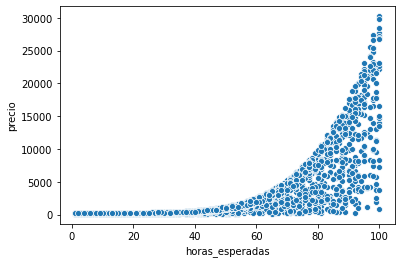

In [4]:
import seaborn as sns

# !pip install seaborn == 0.9.0

sns.scatterplot(x = "horas_esperadas", y = "precio", data = datos)

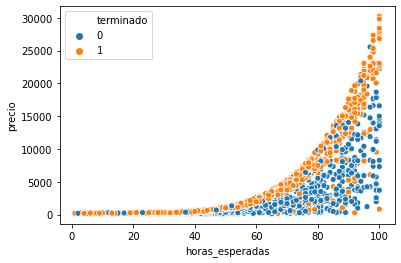

In [5]:
sns.scatterplot(x = "horas_esperadas", y = "precio", data = datos, hue = "terminado")

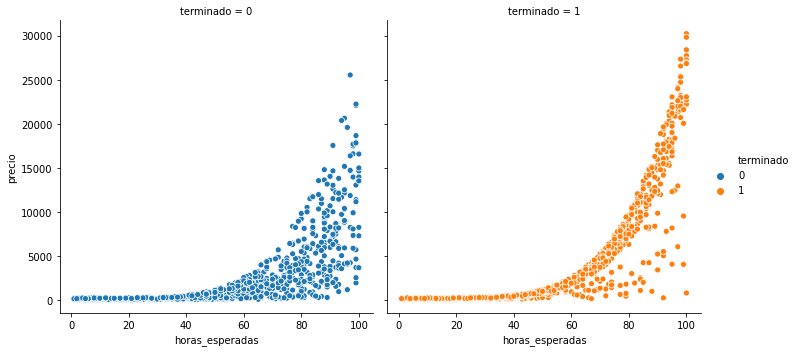

In [6]:
sns.relplot(x = "horas_esperadas", y = "precio", data = datos, hue = "terminado", col = "terminado")

In [7]:
x = datos[["horas_esperadas","precio"]]
y = datos["terminado"]

In [8]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

SEED = 5
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.25, random_state = SEED, stratify = y)
modelo = LinearSVC()
modelo.fit(train_x, train_y)
pred = modelo.predict(test_x)
acuracia = accuracy_score(test_y, pred) * 100

print("Porcentaje de acierto %.2f " % (acuracia))

Porcentaje de acierto 47.41 


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [9]:
import numpy as np
pred_naive = np.ones(len(test_y))
acuracia = accuracy_score(test_y, pred_naive) * 100
print("Porcentaje de acierto de baseline %.2f " % (acuracia))

Porcentaje de acierto de baseline 52.59 


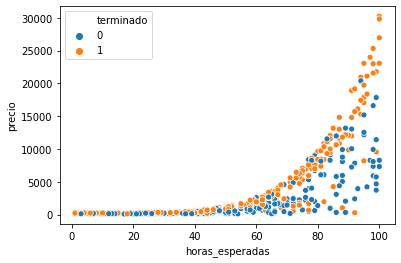

In [10]:
sns.scatterplot(x="horas_esperadas", y = "precio", data = test_x, hue = test_y)

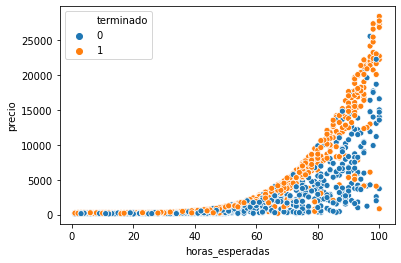

In [11]:
sns.scatterplot(x="horas_esperadas", y = "precio", data = train_x, hue = train_y)

In [12]:
x_min = test_x.horas_esperadas.min()
x_max = test_x.horas_esperadas.max()

y_min = test_x.precio.min()
y_max = test_x.precio.max()

print(x_min, x_max, y_min, y_max)

1 100 100 30223


In [13]:
pixels = 100
eje_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
eje_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)

In [14]:
xx, yy = np.meshgrid(eje_x, eje_y)
puntos = np.c_[xx.ravel(), yy.ravel()]
Z = modelo.predict(puntos)
Z.shape
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

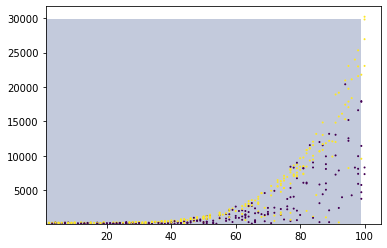

In [15]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(test_x.horas_esperadas, test_x.precio, c = test_y, s= 1)